Installing the python version 3.9

In [1]:
!sudo apt-get update -y
!sudo apt-get install python3.9

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2


Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [993 kB]
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,62

In [2]:
!python --version

Python 3.9.16


Installing the compatible tensorflow and tensorflow federated versions

In [3]:
!pip install --quiet tensorflow==2.8.0
!pip install --quiet tensorflow-probability==0.15.0
!pip install --quiet tensorflow-federated==0.20.0
!pip install --quiet --upgrade nest_asyncio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 937.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.9/819.9 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

importing the required packages

In [4]:
import collections
import attr
import functools
import numpy as np
import pickle
import tensorflow as tf
import tensorflow_federated as tff
import random

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, f1_score, precision_score, recall_score

import nest_asyncio
nest_asyncio.apply()

In [5]:
tf.version.VERSION

'2.8.0'

importing the necessary classes from tensorflow

In [6]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import L2
from tensorflow.keras import Input, Model, layers
from tensorflow.keras import backend as K

importing the pre processed datasets from pickle files

In [7]:
# Open the file in binary mode
with open('/content/drive/MyDrive/Practicum/Kilaru_OUDSA5900/df_processed_2.pkl', 'rb') as file:
  # Call load method to deserialze
  df_train = pickle.load(file)

In [8]:
# Open the file in binary mode
with open('/content/drive/MyDrive/Practicum/Kilaru_OUDSA5900/df_test_processed_2.pkl', 'rb') as file:
  # Call load method to deserialze
  df_test = pickle.load(file)

In [9]:
df_train.head()

,id,entity,sentiment,text
0,2401,Borderlands,1,im get borderland murder
1,2401,Borderlands,1,come border kill
2,2401,Borderlands,1,im get borderland kill
3,2401,Borderlands,1,im come borderland murder
4,2401,Borderlands,1,im get borderland murder


In [10]:
np.unique(df_train['sentiment'])

array([0, 1])

dividing the train and the validation set

In [11]:
df_train = df_train.sample(frac = 1)

train_data, valid_data = train_test_split (df_train,random_state=42, stratify=df_train["sentiment"], test_size=0.2)

In [12]:
print(f"the length of positive examples in train data is {len(train_data[train_data['sentiment']==1])}")
print(f"the length of negative examples in train data is {len(train_data[train_data['sentiment']==0])}")

the length of positive examples in train data is 16666
the length of negative examples in train data is 18033


training the tokenizer and converting the train, validation and test sets to tokens

In [13]:
#setting the max length for examples and maximum vocabulary size for tokenizer
max_length = 100
vocab_size = 1000

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Reload Twitter dataset with new Vocabulary
tokenizer = Tokenizer(num_words=vocab_size,filters='@', split = " ")
tokenizer.fit_on_texts(train_data["text"])

In [15]:
# Vectorize input text using Vocabulary
X_train_vectorized = tokenizer.texts_to_sequences(train_data['text'])
X_valid_vectorized = tokenizer.texts_to_sequences(valid_data['text'])
X_test_vectorized = tokenizer.texts_to_sequences(df_test['text'])

padding the examples to ensure all are of similar length

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(sequences = X_train_vectorized, maxlen = max_length, padding = 'post', truncating = 'post')
X_valid_padded = pad_sequences(sequences = X_valid_vectorized, maxlen = max_length, padding = 'post', truncating = 'post')
X_test_paded = pad_sequences(sequences = X_test_vectorized, maxlen = max_length, padding = 'post', truncating = 'post')

In [17]:
X_train_padded.shape

(34699, 100)

Using embedding to generate the dense vectors and to ensure that words of similar meaning have a similar representation

In [18]:
embeddings_index = dict()
f = open('/content/drive/MyDrive/Practicum/Kilaru_OUDSA5900/glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [19]:
# Create Word Embedding Matrix
embedding_matrix = np.zeros((vocab_size, 100))
for i in range(1,vocab_size):
    embedding_vector = embeddings_index.get(tokenizer.index_word[i])
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Creating the tensorflow model

In [20]:
def create_keras_model(max_length = max_length,
                       vocab_size = vocab_size,
                       embedding_matrix = embedding_matrix):
    '''
    Function to create model for tweets classification
    '''
    # clearing backend session
    tf.keras.backend.clear_session()
    
    model = tf.keras.Sequential([ 
        tf.keras.layers.InputLayer(input_shape=(100,)),
        Embedding(input_dim=vocab_size,output_dim=100,input_length=max_length,weights=[embedding_matrix],trainable=False),
        layers.SpatialDropout1D(0.2),
        layers.Bidirectional(LSTM(64)),
        layers.Dropout(0.5),
        layers.Dense(1, activation = "sigmoid") #, use_bias = True)
    ])
                                                      
    return model

In [ ]:
#model = create_keras_model()

function to divide the data bewteen clients

In [21]:
def Create_Clients(Data, Y, Num_Clients = 5, Client_Fst_Name = "Client"):
  train_dataset_dict = collections.OrderedDict()
  client_names = ["{}_{}".format(Client_Fst_Name, i) for i in range(Num_Clients)]

  size = len(Data)//Num_Clients

  client_dataset = {}

  for i in range(Num_Clients):
    train = Data[i*size : (i+1) * size]
    label = np.array(Y[i*size : (i+1) * size])
    train_dataset_dict[client_names[i]] = collections.OrderedDict((('features', train),('labels',label)))

  return train_dataset_dict

In [22]:
#divison of train data between clients
data_per_client = Create_Clients(X_train_padded, train_data['sentiment'], Num_Clients= 10)

#divison of validation data between clients
data_per_client_valid = Create_Clients(X_valid_padded, valid_data['sentiment'], Num_Clients= 10)

In [23]:
for client in data_per_client.keys():
  print(f"for {client}")
  print(f"the length of positive examples in train data is {np.count_nonzero(data_per_client[client]['labels'] == 1)}")
  print(f"the length of negative examples in train data is {np.count_nonzero(data_per_client[client]['labels'] == 0)}")
  print("\n")

for Client_0
the length of positive examples in train data is 1645
the length of negative examples in train data is 1824


for Client_1
the length of positive examples in train data is 1680
the length of negative examples in train data is 1789


for Client_2
the length of positive examples in train data is 1702
the length of negative examples in train data is 1767


for Client_3
the length of positive examples in train data is 1650
the length of negative examples in train data is 1819


for Client_4
the length of positive examples in train data is 1626
the length of negative examples in train data is 1843


for Client_5
the length of positive examples in train data is 1622
the length of negative examples in train data is 1847


for Client_6
the length of positive examples in train data is 1653
the length of negative examples in train data is 1816


for Client_7
the length of positive examples in train data is 1647
the length of negative examples in train data is 1822


for Client_8
the

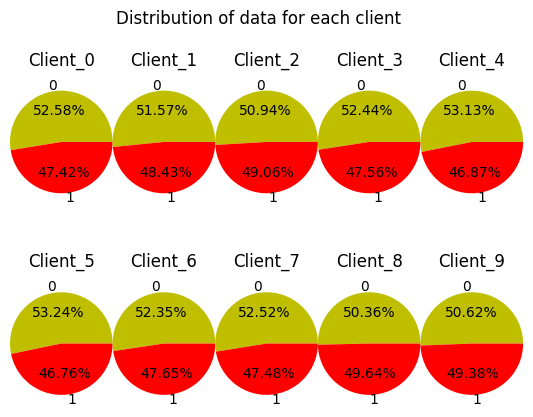

In [54]:
clients = list(data_per_client.keys())
row_count, col_count = 2, 5
plt.figure(0)
for i in range(row_count):
    for j in range(col_count):
        current_client = clients[col_count*i + j]
        ax = plt.subplot2grid((2, 5), (i,j))
        plt.pie(np.unique(data_per_client[current_client]['labels'], return_counts=True)[1], radius=1.5, autopct = "%.2f%%", colors=("y","r"), labels = np.unique(data_per_client[current_client]['labels'], return_counts=True)[0] )
        plt.title(current_client, y=1.3)
        plt.ylabel("")
plt.suptitle("Distribution of data for each client")
plt.show()

constructing federated datasets

In [ ]:
tff_dataset_train = tff.simulation.datasets.TestClientData(data_per_client)
tff_dataset_valid = tff.simulation.datasets.TestClientData(data_per_client_valid)

pre processsing the dataset for Federated learning

In [ ]:
NUM_CLIENTS = 10
NUM_EPOCHS = 3
BATCH_SIZE = 16
SHUFFLE_BUFFER = 200
PREFETCH_BUFFER = 10

def preprocess(dataset):

  def batch_format_fn(element):
    """Flatten a batch of twitter data and return a (features, label) tuple."""
    return (tf.reshape(element['features'], [-1, 100]), 
            tf.reshape(element['labels'], [-1, 1]))

  #return dataset.batch(BATCH_SIZE).map(batch_format_fn)
  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [ ]:
federated_train_data = [preprocess(tff_dataset_train.create_tf_dataset_for_client(x))
  for x in data_per_client.keys()
]

defining the tensorflow federated model

In [ ]:
def model_fn():
  keras_model = create_keras_model(max_length, vocab_size, embedding_matrix)
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=federated_train_data[0].element_spec,
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=[tf.keras.metrics.BinaryAccuracy()])

defining the Federated learning algorithm for training

In [ ]:
federated_training = tff.learning.algorithms.build_unweighted_fed_avg(
                              model_fn,
                              client_optimizer_fn = lambda: tf.keras.optimizers.Adam(learning_rate = 0.05),
                              server_optimizer_fn = lambda: tf.keras.optimizers.Adam(learning_rate = 0.2)
)

defining the Federated learning algorithm for validation

In [ ]:
federated_validation = tff.learning.build_federated_evaluation(model_fn)

initializing the federated learning training algorithm

In [ ]:
state = federated_training.initialize()
metrics = collections.defaultdict(list)

Federated Learning training

In [ ]:
for i in range(20):
  print(f"round:- {i}")

  #randomly choosing the clients for FL
  client_id = np.random.choice(list(data_per_client.keys()),size=6)

  #processing training data 
  federated_train_data = [preprocess(tff_dataset_train.create_tf_dataset_for_client(x))
  for x in client_id
  ]

  #federated training for computing the next state
  result = federated_training.next(state, federated_train_data)

  train_metrics = result.metrics

  state = result.state

  metrics['train_loss'].append(train_metrics['client_work']['train']['loss'])
  metrics['train_accuracy'].append(train_metrics['client_work']['train']['binary_accuracy'])

  #FL model validation
  federated_validation_data = [
        preprocess(tff_dataset_valid.create_tf_dataset_for_client(c)) for c in client_id
      ]

  model_weights = federated_training.get_model_weights(state)
  eval_result = federated_validation(model_weights, federated_validation_data)

  metrics['eval_accuracy'].append(eval_result['eval']['binary_accuracy'])
  metrics['eval_loss'].append(eval_result['eval']['loss'])

  print(f"accuracy:- {train_metrics['client_work']['train']['binary_accuracy']}, loss:- {train_metrics['client_work']['train']['loss']}")
  print(f"val_accuracy:- {eval_result['eval']['binary_accuracy']}, loss:- {eval_result['eval']['loss']}")


round:- 0
accuracy:- 0.8000224232673645, loss:- 0.5831731557846069
val_accuracy:- 0.8239138722419739, loss:- 0.4536806046962738
round:- 1
accuracy:- 0.7982928156852722, loss:- 0.7142188549041748
val_accuracy:- 0.8314110040664673, loss:- 0.45540934801101685
round:- 2
accuracy:- 0.8067166209220886, loss:- 0.6932961940765381
val_accuracy:- 0.8317954540252686, loss:- 0.45600274205207825
round:- 3
accuracy:- 0.796146810054779, loss:- 0.9154990911483765
val_accuracy:- 0.8337178230285645, loss:- 0.4713175594806671
round:- 4
accuracy:- 0.8010473847389221, loss:- 0.606918454170227
val_accuracy:- 0.831026554107666, loss:- 0.45145735144615173
round:- 5
accuracy:- 0.7923513054847717, loss:- 0.6542890071868896
val_accuracy:- 0.8341022729873657, loss:- 0.44409602880477905
round:- 6
accuracy:- 0.8063162565231323, loss:- 0.5776400566101074
val_accuracy:- 0.8321799039840698, loss:- 0.45784837007522583
round:- 7
accuracy:- 0.8097754716873169, loss:- 0.5803235173225403
val_accuracy:- 0.8239138722419739, 

assigning the FL model weights to a tf model for testing purpose

In [ ]:
model = create_keras_model()
model_weights = federated_training.get_model_weights(state)
model_weights.assign_weights_to(model)


Predicting the metrics on training data

In [ ]:
X_train_Pred = model.predict(X_train_padded)
print(accuracy_score(train_data['sentiment'], np.round(X_train_Pred)))
print(confusion_matrix(train_data['sentiment'], X_train_Pred >= 0.5))

0.8511484480820773
[[15291  2742]
 [ 2423 14243]]


Predicting the metrics on Validation data

In [ ]:
X_valid_pred = model.predict(X_valid_padded)
print(accuracy_score(valid_data['sentiment'], np.round(X_valid_pred)))
print(confusion_matrix(valid_data['sentiment'], X_valid_pred > 0.5))

0.82835734870317
[[3705  804]
 [ 685 3481]]


Predicting the metrics on test data

In [ ]:
X_test_pred = model.predict(X_test_paded)]
print(accuracy_score(df_test['sentiment'], np.round(X_test_pred)))

0.8931860036832413
[[243  23]
 [ 35 242]]


In [ ]:
print(f"F1 score :- {f1_score(df_test['sentiment'], X_test_pred > 0.5)}")
print(f"prescesion :- {precision_score(df_test['sentiment'], X_test_pred > 0.5)}")
print(f"Recall :- {recall_score(df_test['sentiment'], X_test_pred > 0.5)}")
cf_mat = confusion_matrix(df_test['sentiment'], X_test_pred > 0.5)
print('Confusion matrix')
print(cf_mat)

F1 score :- 0.8929889298892989
prescesion :- 0.9132075471698113
Recall :- 0.8736462093862816
Confusion matrix
[[243  23]
 [ 35 242]]


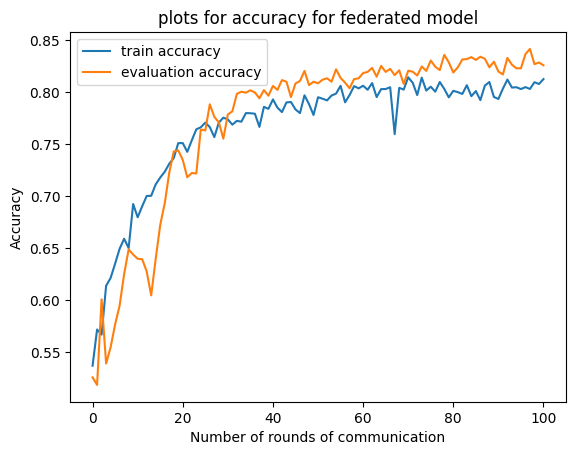

In [ ]:
plt.plot(metrics['train_accuracy'], label = "train accuracy")
plt.plot(metrics['eval_accuracy'], label = "evaluation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of rounds of communication")
plt.title("plots for accuracy for federated model")
plt.legend()
plt.show()

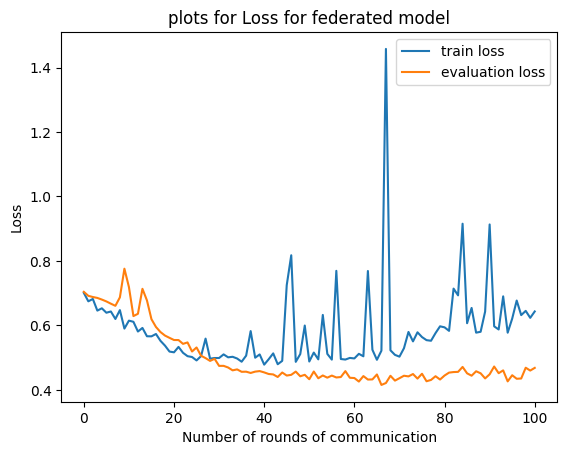

In [ ]:
plt.plot(metrics['train_loss'], label = "train loss")
plt.plot(metrics['eval_loss'], label= "evaluation loss")
plt.ylabel("Loss")
plt.xlabel("Number of rounds of communication")
plt.title("plots for Loss for federated model")
plt.legend()
plt.show()

Text(0.5, 1.0, 'ROC Curve for Centralized learning')

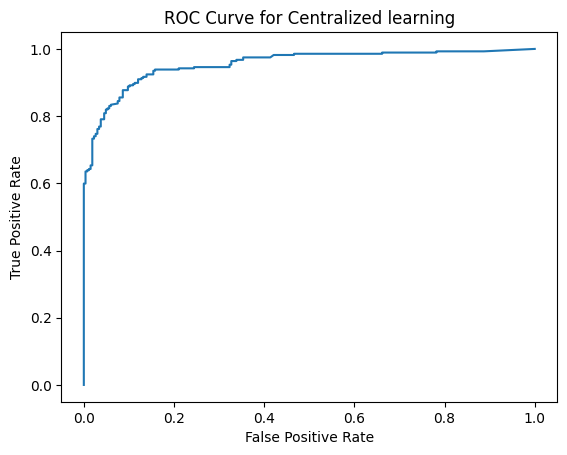

In [ ]:
fpr, tpr, thresholds = roc_curve(df_test['sentiment'], X_test_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Centralized learning")

In [ ]:
auc= roc_auc_score(df_test['sentiment'], X_test_pred)
print(f'model 2 AUC score: {auc}')

model 2 AUC score: 0.9549007898808393


Text(0.5, 0.98, 'Plots of accuracy and loss for Federated Learning Model')

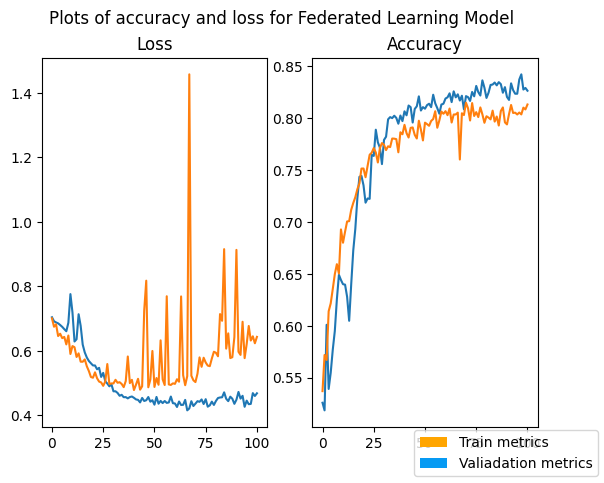

In [ ]:
figure, axis = plt.subplots(1, 2)
handles = [
    Patch(facecolor="#FFA500", label= "Train metrics"),
    Patch(facecolor="#069AF3", label="Valiadation metrics")
]

axis[1].plot(metrics['eval_accuracy'], label = 'validation accuracy')
axis[1].plot(metrics['train_accuracy'], label = "train accuracy")
axis[1].set_title("Accuracy")

axis[0].plot(metrics['eval_loss'], label = 'validation loss')
axis[0].plot(metrics['train_loss'], label = "train loss")
axis[0].set_title("Loss")
figure.legend(handles=handles, loc='lower right')

figure.suptitle('Plots of accuracy and loss for Federated Learning Model')

metrics values

In [ ]:
metrics

defaultdict(list,
            {'train_loss': [0.7008927,
              0.67480963,
              0.68214285,
              0.6459687,
              0.6531578,
              0.6394571,
              0.643261,
              0.620012,
              0.6475269,
              0.59021056,
              0.61486685,
              0.6113093,
              0.581048,
              0.5922597,
              0.5664446,
              0.56619066,
              0.5734683,
              0.5522612,
              0.537391,
              0.51895106,
              0.5166219,
              0.53341436,
              0.5150419,
              0.50468725,
              0.5020439,
              0.4915058,
              0.504781,
              0.559134,
              0.4969489,
              0.4989793,
              0.49897355,
              0.51022846,
              0.501089,
              0.502753,
              0.49738213,
              0.48746008,
              0.5063254,
              0.5825608,
              